In [32]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.animation as animation 
import mpl_toolkits.mplot3d.axes3d as p3


In [33]:
acidities = pd.read_csv("./ass1_data/data/q1/linearX.csv")
densities = pd.read_csv("./ass1_data/data/q1/linearY.csv") 

In [34]:
def normalize(arr):
    mean = arr.mean()
    # print(mean) 
    # variance = acid_arr.var() 
    std_dev = arr.std()  
    arr = (arr - mean)/std_dev  
    return arr 

In [35]:

acid_arr = acidities["Acidities"].to_numpy()
acid_arr = normalize(acid_arr) 
# print(acid_arr) 

acidities["Intercept"] = 1 
cols = acidities.columns.to_list() 
cols = cols[1:] + cols[:1] 
acidities = acidities[cols]   
acidities["Acidities"] = acid_arr
# print(acidities) 

density_arr = densities["Densities"].to_numpy() 
density_arr = normalize(density_arr)
densities["Densities"] = density_arr 

X = acidities.to_numpy()  
Y = density_arr


In [36]:
def compute_error(theta, X, Y):
    Z = np.matmul(X, theta) - Y 
    m = Y.size
    return (np.matmul(np.transpose(Z), Z))/(2*m) 

In [37]:
def compute_gradient(theta , X, Y) : 
    Z = Y - np.matmul(X, theta) 
    # print(Z)
    gradient = np.zeros(theta.size)
    m = Y.size  
    for j in range(theta.size):
        X_j = X [:, j] 
        gradient[j] = np.sum(Z * X_j) / m 
    # gradient = np.sum( Z * X , axis = 0)
    # print(gradient)  
    return gradient 

In [38]:
def gradient_descent(X, Y, learning_param):
       dim = X[0].size  
       theta = np.zeros(dim)  

       inv = np.linalg.inv(np.matmul(np.transpose(X), X)) 
       actual_theta = np.matmul(np.matmul(inv, np.transpose(X)), Y) 

       no_of_iterations = 0
       # initial_error = compute_error(theta, X, Y) 
       # error = initial_error 
       # epsilon = 0.0000001 * initial_error 
       # prev_error = 2*initial_error # some large value initially   

       plot_data = [] 
       current_grad = compute_gradient(theta, X, Y) 
       epsilon = 0.001 * np.linalg.norm(current_grad) 
       while (np.linalg.norm(current_grad) > epsilon):
              # prev_error = error 
              current_grad = compute_gradient(theta, X, Y )
              theta = theta + learning_param * current_grad 
              error = compute_error(theta, X,Y)  
              print(f"Iteration {no_of_iterations} | Theta {theta} | Error {error} | Grad {current_grad}")
              plot_data.append([theta[0], theta[1], error]) 
              # print("error is", error)  
              # print("current theta is", theta )
              # print("no of iterations is ", no_of_iterations) 
              no_of_iterations += 1 

       # print(plot_data)
       print("gradient descent result is",theta)
       print("actual theta is", actual_theta)  
       print(f"no of iterations is {no_of_iterations}") 
       return (theta, plot_data) 

## plotting  the data

In [39]:
# def plot_2d_plot(acid_arr,  acidities, Y, theta):
#     plt.scatter(acid_arr, Y, label = "training set") 
#     plt.title("Training set vs hypothesis function")

#     H_theta = np.matmul(  acidities, theta ) 
#     # label = "slope = " + str(theta[1]) + "\n intercept = " + str(theta[0]) 
#     plt.plot(acid_arr, H_theta, label = "hypothesis function", color = "green") 

#     plt.xlabel("X axis (normalized acidities)") 
#     plt.ylabel("Y axis (normalized densities)" )

#     plt.legend()
#     plt.show()

## 3D mesh plot of error function

In [40]:
%matplotlib ipympl 

theta_x = np.arange(-0.5 , 0.5, 0.01 ) 
theta_y = np.arange(0,1 , 0.01) 
X_mesh, Y_mesh = np.meshgrid(theta_x, theta_y) 
# print(X_mesh) 
# print(Y_mesh)
X_row, X_col = X_mesh.shape
Y_row, Y_col = Y_mesh.shape 

error_surface = np.zeros((X_row, X_col))  
# print(X) 

for i in range(X_row):
    for j in range(X_col):
        x_coord = X_mesh[i,j] 
        y_coord = Y_mesh[i,j] 
        temp_theta = np.array([x_coord, y_coord])   
        error_surface[i,j] = compute_error(temp_theta, X, Y)


# fig = plt.figure(dpi=150)


In [41]:
def plot_3d_plot(plot_data, save_name):
    fig = plt.figure() 
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter([], [], [], c='b', marker='.', s = 8, alpha=0.7)

    ax.set(xlim3d=(0, 0.5), xlabel='Theta 0')
    ax.set(ylim3d=(0, 1), ylabel='Theta 1')
    ax.set(zlim3d=(0.2, 0.8), zlabel='Z')

    ax.plot_surface(X_mesh, Y_mesh, error_surface, alpha = 0.4)   


    # Initialization function
    def init():
        sc._offsets3d = ([], [], [])
        return sc, 

    # Animation function
    def update(frame):
        # if (frame % 5 == 0):
        x, y, z = zip(*plot_data[:frame+1])
        sc._offsets3d = (x, y, z)

        if frame > 0:
            prev_x, prev_y, prev_z = plot_data[frame-1]
            arrow_x = x[-1] - prev_x
            arrow_y = y[-1] - prev_y
            arrow_z = z[-1] - prev_z
            ax.quiver(prev_x, prev_y, prev_z, arrow_x, arrow_y, arrow_z, color='red', linewidth = 0.5 )

        return sc,

    azim_angle = 11 # Adjust the azimuth angle (horizontal rotation)
    elev_angle = 16  # Adjust the elevation angle (vertical rotation)
    ax.view_init(elev=elev_angle, azim=azim_angle)


    # Create the animation
    frame_interval = 200 
    ani = animation.FuncAnimation(fig, update, frames=len(plot_data), init_func=init, blit=True, interval = 
                                frame_interval)
    ani.save( save_name , writer='imagemagick', dpi = 300) 
    # Display the animation
    plt.show()

In [42]:
# plot_3d_plot(plot_data, "1_c_animation.png") 

## Plotting Contours

In [43]:
def plot_contours(plot_data, save_name, time_interval):
    fig, ax2d = plt.subplots() 
    plot_data = np.array(plot_data)
    contour_data = plot_data[:, 0:2 ] 


    contour = ax2d.contourf(X_mesh, Y_mesh, error_surface, levels=25, cmap='viridis') 
    ax2d.set_xlabel('Theta 0')
    ax2d.set_ylabel('Theta 1') 
    ax2d.set_title("2D contour plot of gradient descent") 
    ax2d.set(xlim = (-0.5, 0.4), xlabel='Theta 0')
    ax2d.set(ylim =(0, 0.9), ylabel='Theta 1')

    sc = ax2d.scatter([], [], color='grey', marker='.', s = 6 ) 
    arrows = [] 

    def update_contour_plot(frame):
        # sc.set_offsets(contour_data[: frame])
        if frame > 1:
            prev_point = contour_data[frame - 2] 
            curr_point = contour_data[frame - 1] 

            direction = np.array(curr_point) - np.array(prev_point)
            direction /= np.linalg.norm(direction)
            
            tail_offset = direction * 0.05

            arrow = ax2d.annotate('', curr_point, prev_point - tail_offset, arrowprops=dict(arrowstyle='->', color='black',
                                mutation_scale=6)) 
            arrows.append(arrow)
        
        return arrows

    ani = animation.FuncAnimation(fig, update_contour_plot, frames=len(contour_data), interval= time_interval, repeat = True, blit = True )

    animation_filename = save_name 
    ani.save(animation_filename, writer='imagemagick', dpi = 300)
    # plt.colorbar()
    plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


Iteration 0 | Theta [-5.96590138e-15  6.55064426e-02] | Error 0.4592346067458747 | Grad [-5.96590138e-14  6.55064426e-01]
Iteration 1 | Theta [-1.13428919e-14  1.24462241e-01] | Error 0.4262146382100332 | Grad [-5.37699052e-14  5.89557984e-01]
Iteration 2 | Theta [-1.61789124e-14  1.77522460e-01] | Error 0.39946846369600153 | Grad [-4.83602047e-14  5.30602185e-01]
Iteration 3 | Theta [-2.05356218e-14  2.25276656e-01] | Error 0.377804062339636 | Grad [-4.35670944e-14  4.77541967e-01]
Iteration 4 | Theta [-2.44607598e-14  2.68255433e-01] | Error 0.3602558972409798 | Grad [-3.92513799e-14  4.29787770e-01]
Iteration 5 | Theta [-2.79948217e-14  3.06936333e-01] | Error 0.3460418835110683 | Grad [-3.53406193e-14  3.86808993e-01]
Iteration 6 | Theta [-3.11758050e-14  3.41749142e-01] | Error 0.33452853238984 | Grad [-3.18098325e-14  3.48128094e-01]
Iteration 7 | Theta [-3.40410963e-14  3.73080670e-01] | Error 0.32520271798164513 | Grad [-2.86529134e-14  3.13315284e-01]
Iteration 8 | Theta [-3.6

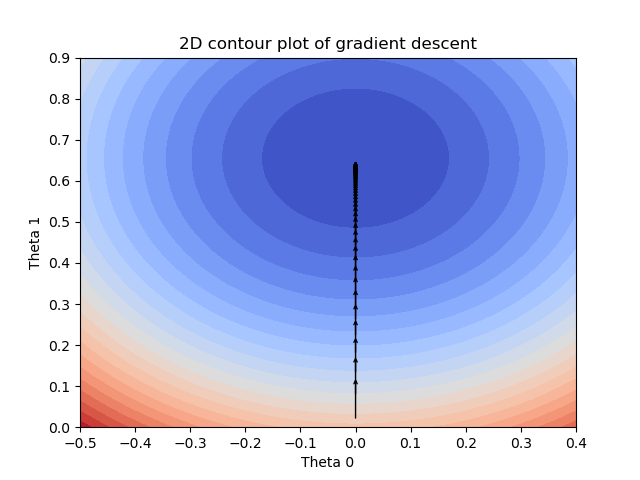

In [44]:
 
# learning_params = [( 0.001, 20), (0.025, 200), (0.1,200) ] 
# learning_params = [(0.001, 1),  (0.025, 200)] 
learning_params = [(0.1, 200)]
for learning_param, time_interval in learning_params:
    theta, plot_data = gradient_descent(X, Y, learning_param)  
    plot_contours(plot_data, f"1_e_animation_{learning_param}.png", time_interval)   


In [ ]:
def batch_gradient_descent(X, Y):
    theta = np.zeros(X[0].size) 
    print(theta) 
    initial_error = compute_batch_error(X, Y, theta,  Y.size , 1 ) 
    error = initial_error 
    epsilon = 0.0001 * initial_error 
    # print(f"intial error is {initial_error}")
    learning_parameter = 0.001
    no_of_iterations = 0 

    previous_error = 2*error 
    while ( previous_error - error > epsilon) : 

        previous_error = error 
        grad = compute_batch_gradient(X, Y, theta, Y.size, 1 ) 
        theta = theta + learning_parameter * grad 
        
        error = compute_batch_error(X, Y,theta,  Y.size , 1 ) 


        # print(f"current theta is {theta}") 

        no_of_iterations += 1 

    print(f"no of iterations is {no_of_iterations}") 
    print(f"learned theta is {theta}") 
    return theta 
    